<img src="../../predictioNN_Logo_JPG(72).jpg" width=200>

---

## Simulation

### Introduction to Data Science
### Last Updated: October 3, 2022
---  

### OBJECTIVES
- Simulate random variables
- Quantify the probability of an event using simulation
- Create a random variable which is a mixture of random variables
- Understand why setting a seed is useful

### CONCEPTS
- uncertainty
- countable and uncountable
- probability distribution
- simulation to quantify uncertainty
- finite mixture of normal (Gaussian) distributions
- seed for simulating pseudo-random numbers

---


In [2]:
import numpy as np
import seaborn as sns

## I. Simulation for Quantifying Uncertainty

Many phenomena have values that are uncertain, but there is structure in the uncertainty: 

- What will Google's stock price close at tomorrow?
- When will the next Italian restaurant open in Chicago?
- How many people will attend the next Taylor Swift concert?

Such values can be modeled by a *probability distribution* which assigns a probability to each possible value of a *random variable*.

Example: Flip two fair coins and note the total number of heads.  
There are only three possible outcomes, and since these outcomes can be *counted*, this is a *discrete outcome space*.  

| #HEADS      | PROBABILITY |
| ----------- | ----------- |
|0|1/4|
|1|1/2|
|2|1/4|

For more about *countability*, see the Appendix at bottom.

---

**THINK ABOUT AND DISCUSS**  

1) Does this table make sense?

---

If we ask the question: what is the probability of two heads?

We can look up the answer in the table: 1/4

How about this one: if we flip 100 fair coins, what is the probability of 50 heads?

We can work out the probability analytically, or we can use simulation like this:

1. Use a mathematical model that fits the problem  
2. Draw a "large" number of outcomes from the model and compute the answer. The larger the number, the more accurate the answer.

For this problem, the *binomial* distribution is appropriate:
- it returns the number of successes given:
  - there are $n$ independent trials 
  - the probability of success is $p$ for each trial

<AxesSubplot:ylabel='Count'>

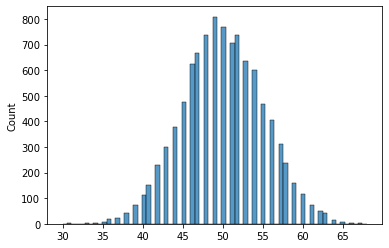

In [4]:
size = 10000 # simulated values
n = 100 # number of trials
p = 0.5 # probability of success
outcomes = np.random.binomial(n, p, size)

# histogram of the outcomes
sns.histplot(outcomes)

---

**THINK ABOUT AND DISCUSS**

2) Rerun the cell above several times to simulate different outcomes. What do you notice about this plot?

The distribution is roughly symmetric, with the majority of outcomes in the middle.

---

Now that we have a large number of outcomes, we can compute the probability of 50 heads.  
It is equal to the fraction of simulated values equal to 50:

$Prob(Heads = 50) = #outcomes_where_value=50 / #simulated_values$

In [136]:
len(outcomes[outcomes==50]) / size

0.0783

## II. Pseudo-Random Numbers

At the heart of simulation is the generation of sequences of numbers.  
Each time you ran the simulations above, it generated different numbers.  
The values were not random; they were actually deterministic and computed from a formula.  
They appeared random, hence the term *pseudo-random*.

The sequences are indexed by a **seed**.  
If you ask for the same quantity of numbers with the same seed, you will see the same numbers.

When we want to replicate results, we use a seed.  
**For the simulation homework, you will use a seed so that the results can match the solutions.**

Let's do one more simulation, with and without a seed. Run each cell several times and observe what happens.

In [20]:
# no seed set. the values will change.
np.random.binomial(n=5, p=0.5, size=10)

array([3, 2, 2, 3, 2, 4, 4, 1, 1, 3])

In [23]:
# seed set. the values will not change.
np.random.seed(314) # use seed=314
np.random.binomial(n=5, p=0.5, size=10)

array([4, 3, 2, 3, 4, 4, 3, 2, 4, 2])

Next, we set the same seed and generate 11 numbers instead of 10. notice the first 10 numbers match the run above.

In [24]:
np.random.seed(314) # use seed=314
np.random.binomial(n=5, p=0.5, size=11)

array([4, 3, 2, 3, 4, 4, 3, 2, 4, 2, 3])

## III. Normal (Gaussian) Distribution

As the number of trials increases, the binomial distribution gets closer to a *normal distribution*.  
The normal distribution is also named the *Gaussian distribution* for the mathematician who discovered it: Carl Friedrich Gauss.

The plots below illustrate the behavior.

<AxesSubplot:ylabel='Count'>

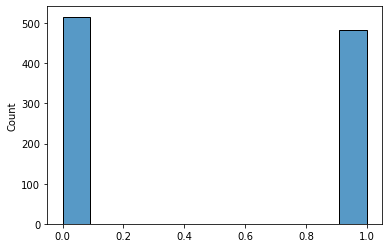

In [7]:
size=1000
sns.histplot(np.random.binomial(1, p, size))

<AxesSubplot:ylabel='Count'>

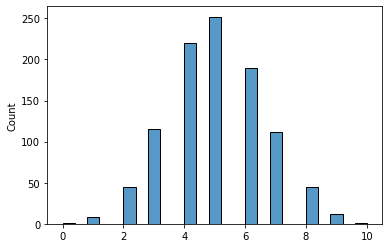

In [9]:
sns.histplot(np.random.binomial(10, p, size))

<AxesSubplot:ylabel='Count'>

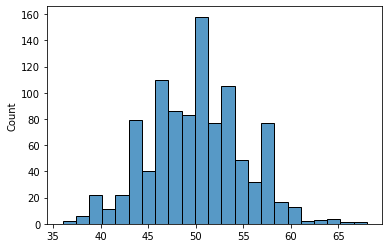

In [10]:
sns.histplot(np.random.binomial(100, p, size))

<AxesSubplot:ylabel='Count'>

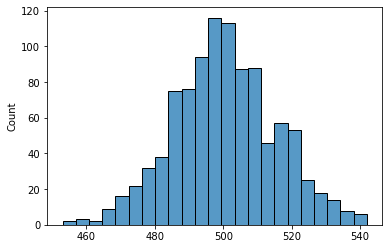

In [11]:
sns.histplot(np.random.binomial(1000, p, size))

<AxesSubplot:ylabel='Count'>

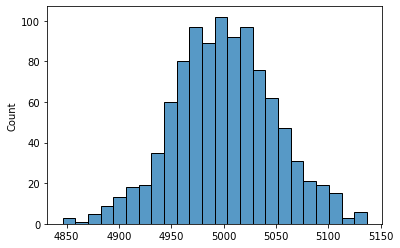

In [17]:
sns.histplot(np.random.binomial(10000, p, size))

The normal distribution is the most common continuous distribution, and it is described by two parameters:

- the mean $\mu$, which measures the center of the distribution
- the standard deviation $\sigma$, which measures the spread of the distribution

Next, we simulate 1000 draws from a normal distribution with mean 5000 and standard deviation 1.  
Notice this looks fairly similar to the binomial simulation above.

<AxesSubplot:ylabel='Count'>

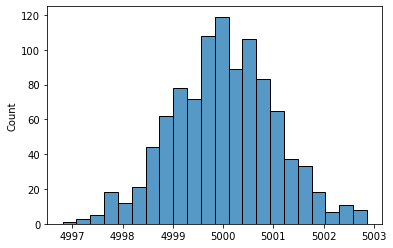

In [22]:
sns.histplot(np.random.normal(loc = 5000, scale = 1, size = 1000))

---

**TRY FOR YOURSELF**

3) Simulate 100000 draws from a normal distribution with mean 5000 and standard deviation 10

<AxesSubplot:ylabel='Count'>

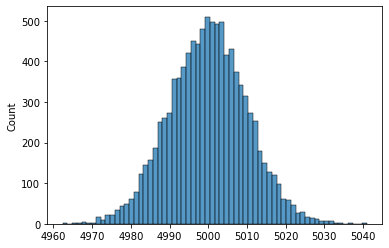

In [177]:
sns.histplot(np.random.normal(loc = 5000, scale = 10, size = 10000))

---

## IV. Mixture Model Simulation

Many random phenomena follow distributions that are more complex than a normal (Gaussian) distribution.  
Some may be modeled effectively with a mixture of normals.  

The mixing parameter $p$ weighs two normal distributions $N_1$ and $N_2$ like this:

$f = p * N_1 + (1 - p) * N_2$ 

where 

- $f$ is the overall result
- $N_1$ is weighted by $p$ 
- $N_2$ is weighted by the remaining fraction $1-p$

---

### Running the Simulation

We start by simulating two random normal distributions. The first has a greater mean and smaller standard deviation.  
If we were modeling the financial market, $N_1$ might represent a bull market and $N_2$ might represent a bear market.

In [101]:
# simulate 100 random normals with mean 0.1 and standard deviation 0.01
x1 = np.random.normal(loc = 0.10, scale = 0.1, size = 1000)
print('first 10 values from x1: \n', x1[:10])

# simulate 100 random normals with mean -0.15 and standard deviation 0.2
x2 = np.random.normal(loc = -0.15, scale = 0.2, size = 1000)
print('')
print('first 10 values from x2: \n', x2[:10])

first 10 values from x1: 
 [ 0.07672168  0.10537981 -0.06529469  0.0119827   0.21128624  0.05913768
  0.1408433   0.12046697  0.09579586  0.08241729]

first 10 values from x2: 
 [-0.50731061  0.0776752  -0.0038083  -0.06152088 -0.26899087 -0.22872431
 -0.04107909 -0.08449928 -0.29614683 -0.41301345]


Next, let's visualize the distributions on a single plot:

<AxesSubplot:ylabel='Count'>

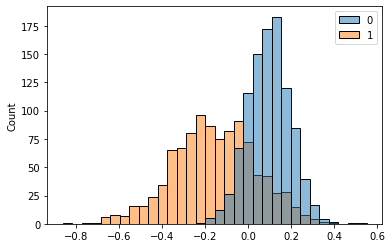

In [102]:
sns.histplot([x1, x2])

This roughly has a bimodal distribution.

---

**TRY FOR YOURSELF**

4) Rerun the cells above to simulate new data and recreate the plot.

---

Next, we set a mixing parameter $p$ and generate $f$, the random variable that follows the mixture distribution.  

Numpy makes it easy to scale vectors and add them, since it does operations elementwise.

In [71]:
p = 0.75
f = p * x1 + (1 - p) * x2

print('first value from x1:\n', x1[:1], '\n')
print('first value from x2:\n', x2[:1], '\n')
print('first value from f:\n', f[:1])

first value from x1:
 [0.15653217] 

first value from x2:
 [-0.48107726] 

first value from f:
 [-0.00287019]


---

**TRY FOR YOURSELF**

5) Use the formula for $f$ to verify that the result is correct.

In [73]:
# answer
0.15653217 * .75 + -0.48107726 * .25

-0.002870187499999996

---

Next, let's plot the histogram of $f$:

<AxesSubplot:ylabel='Count'>

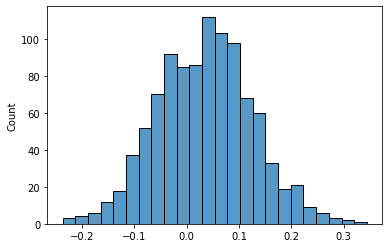

In [72]:
sns.histplot(f)

Compute the overall mean of $f$

In [74]:
f.mean()

0.034604625497682104

The distribution is bimodal again, but it looks more similar to $N_1$.  
Also notice the mean is positive.  
Does this make sense?

---

**TRY FOR YOURSELF**

6a) Change the mixing parameter $p$ to 0.25, regenerate $f$, compute the mean, and plot the histogram. What do you observe?

<AxesSubplot:ylabel='Count'>

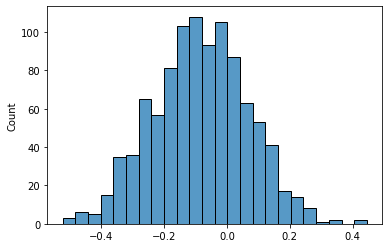

In [80]:
# answer
p = 0.25
f = p * x1 + (1 - p) * x2
sns.histplot(f)

In [77]:
f.mean()

-0.0847967135315157

The mean is now negative, and the distribution looks more similar to $N2$.

6b) What is the probability that this random variable $f$ will be less than -0.2?  
If this variable were the percentage change in the stock market over a year, this would mean a loss bigger than 20%.

Hint: Simulate $f$ a large number of times. Then use these values and the definition of probability to compute an answer.

In [100]:
# answer

nsim = 100000
# simulate x1 and x2
x1 = np.random.normal(loc = 0.10, scale = 0.1, size = nsim)
x2 = np.random.normal(loc = -0.15, scale = 0.2, size = nsim)

p = 0.25
f = p * x1 + (1 - p) * x2

# probability = #values<-0.2 / #simulated_values
len(f[f<-.2]) / nsim

0.23172

---

## V. Summary

We covered a lot of ground in this exercise:

- We studied a discrete random variable that follows a binomial distribution. Discrete random variables have a countable number of  outcomes.
- We studied a continuous random variable that follows a normal distribution. Continuous random variables have an uncountable number of outcomes.
- We simulated the random variables to quantify events (e.g., number of heads)
- We learned about pseudo-random numbers and how to replicate their values by setting a seed 
- We observed how a binomially-distributed variable approaches a normally-distributed variable as we increase the number of trials
- We studied and simulated a random variable following a mixture of normal distributions

---

## Appendix: Countable versus Uncountable

Think about the sequence 0, 1, 2, ...  
This goes on forever (it is infinite), but given enough time, we can count off the numbers. The sequence is **countable**.  

Now think about all of the real numbers in the interval $[0,1]$.
The interval contains an infinite quantity of numbers, and we could not even count the numbers. The sequence is **uncountable**.

There's a notion of sizes of infinity here: the uncountable example is larger than the countable example.

This distinction is important:
- a random variable with a countable domain is a *discrete random variable* and it can be modeled with discrete probability distributions like the *binomial distribution*.

- a random variable with an uncountable domain is a *continuous random variable* and it can be modeled with continuous probability distributions like the *normal distribution*.

---